## Dataset 1 : AirBnB Open Data from Seattle
###### Problem to solve is Regression
********

## Converting all 3 csv files to dataframes

In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
calendar = pd.read_csv('seattle/calendar.csv')
listings = pd.read_csv('seattle/listings.csv')
reviews = pd.read_csv('seattle/reviews.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Adding Polarity column to reviews_df
************

In [6]:
# Replacing NaN with Nil
reviews.replace(np.nan, 'NIL', regex=True,inplace=True)

# Calculate Polarity and assign it to another column
reviews['polarity'] = reviews.apply(lambda x: TextBlob(x['comments']).sentiment.polarity, axis=1)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,0.433333
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0.301136
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",0.410417
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,0.358333
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0.493485


In [7]:
# Grouping by listing_id and averaging all the polarity per listing_id
polarity_per_listing_id=reviews.groupby('listing_id',as_index=False)['polarity'].mean()
polarity_per_listing_id.head()

,listing_id,polarity
0,4291,0.368664
1,5682,0.362327
2,6606,0.358105
3,7369,0.421435
4,9419,0.332262


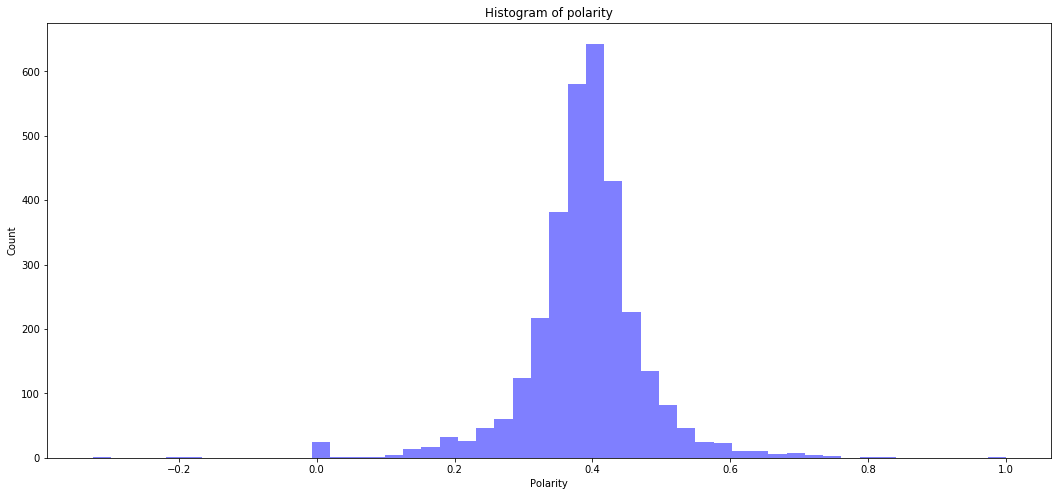

In [8]:
# A histogram of the polarity scores.
num_bins = 50
plt.figure(figsize=(18,8))
n, bins, patches = plt.hist(polarity_per_listing_id.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

Most polarity scores are above 0 which means most of them are postive sentiment.

In [9]:
## Plot reviews per year(to do)

# Cleaning up the data
*****

Merging polarity_per_listing_id with listing 

In [10]:
# Right join btw 2 dataframes (on 'id')
# listings & polarity_per_listing_id
combined_listings = (polarity_per_listing_id.merge(listings,left_on='listing_id',right_on='id',how='right')).drop('listing_id',axis=1)
combined_listings.shape

(3818, 93)

In [11]:
combined_listings.head()

,polarity,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.368664,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
1,0.362327,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
2,0.358105,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
3,0.421435,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50
4,0.332262,9419,https://www.airbnb.com/rooms/9419,20160104002432,2016-01-04,Golden Sun vintage warm/sunny,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,5,1.19


# To Do
We can try to predict the polarity scores based on the price

In [12]:
combined_listings['price']

0        $82.00
1        $48.00
2        $90.00
3        $85.00
4        $90.00
         ...   
3813    $185.00
3814    $200.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object